In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import nibabel as nib 
import os
import matplotlib.pyplot as plt
import tkinter
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [87]:
def show_slices(img, slices, title=None, heatmap=None):
    if title:
        title = title
    else:
        title=''
    if heatmap:
        heatmap=heatmap
    else:
        heatmap = 'binary'
    

    """ Function to display row of image slices """
    x, y, z = slices
    slices = [img[x, :,:], img[:, y, :], img[:, :, z]]
    fig, axes = plt.subplots(1, len(slices),figsize=(20,8))
    order_title = ['sagittal', 'coronal', 'horizonal']
    
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap=heatmap, origin="lower")
        full_t = title + ' '+ order_title[i]
        axes[i].set_title(full_t)
        
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    im = axes[i].imshow(slice.T, cmap=heatmap, origin="lower")
    fig.colorbar(im,cax=cax, orientation='vertical')
    figure = fig
    return figure



        

In [13]:
# set lesion mask directory
lesionmask_dir = '/Users/emilyolafson/GIT/ENIGMA/data/lesionmasks/all_lesionmasks_2009tov6_usingSym_rename/'

# load stroke demog data
enigma=pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/data/Behaviour_Information_ALL_April7_2022.csv', header=0)

sublist = os.listdir(lesionmask_dir)
niftis=[]
sublist_ids=[]
niftis_array=np.zeros(shape=(182, 218, 182,1))
vol=[]
for sub in sublist:
    subject=enigma[enigma['BIDS_ID']==sub[0:12]].reindex()

    niftis.append(nib.load(lesionmask_dir + sub))
    sublist_ids.append(sub[0:12])
    imgfile = nib.load(lesionmask_dir + sub).get_fdata()

    vol.append(np.sum(imgfile>0))
    #niftis_array= np.append(niftis_array, np.reshape(nib.load(lesionmask_dir + sub).get_fdata(), [182, 218, 182, 1]),axis=3)
        # whatever. building this in matlab bc jupyter notebook is too slow with matrices.
        
np.savetxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/lefthem_lesion_arraysublist.txt', sublist_ids, fmt='%s')
#np.save('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/lefthem_lesion_array.npy', niftis_array) # save the big matrix


In [154]:
np.savetxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/lefthem_lesion_arraysublist.txt', sublist_ids, fmt='%s')


515
Average N voxels: 25674.86213592233
Median N voxels: 6192.0


(array([402.,  53.,  26.,  16.,   9.,   5.,   3.,   0.,   0.,   1.]),
 array([     0. ,  35094.6,  70189.2, 105283.8, 140378.4, 175473. ,
        210567.6, 245662.2, 280756.8, 315851.4, 350946. ]),
 <BarContainer object of 10 artists>)

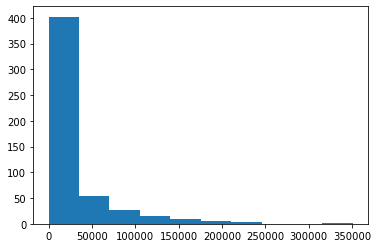

In [4]:
print(len(vol))
print('Average N voxels: {}'.format(np.mean(vol)))
print('Median N voxels: {}'.format(np.median(vol)))
plt.hist(vol)

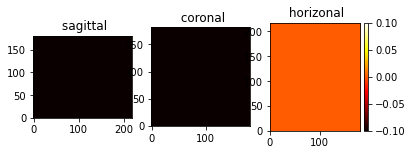

In [5]:
# plot frequency of of left hemisphere lesions
img=np.sum(niftis_array, axis=3)
show_slices(img, [100,100,100],heatmap='hot')

3D array dimensionality: (182, 218, 182)
Total number of voxels in 3D array: 7221032
Number of voxels corresponding to brain tissue: 1827095


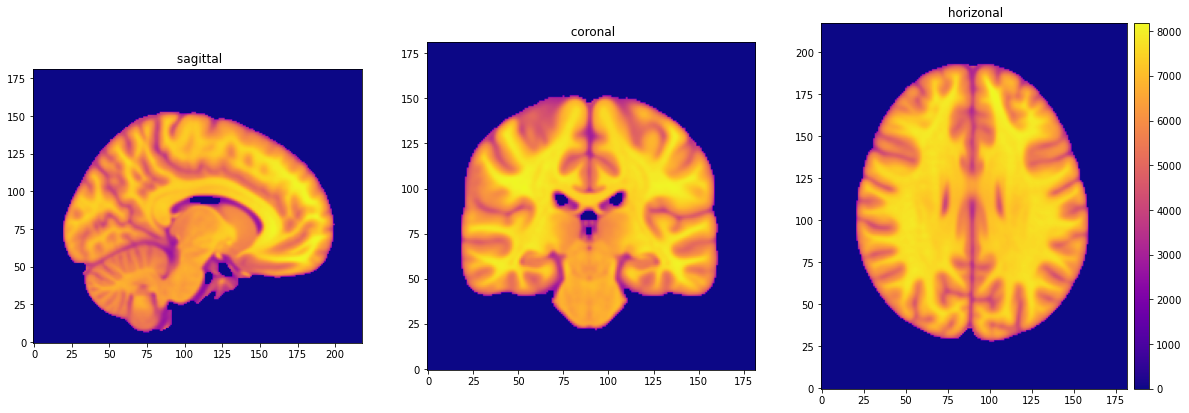

In [136]:
# load mni v6 template.
mni_template = nib.load('/usr/local/fsl/data/standard/MNI152_T1_1mm_brain.nii.gz').get_fdata()
mni = show_slices(mni_template, [100, 100, 100],heatmap='plasma')
sum_voxels = np.sum(mni_template==0)+np.sum(mni_template>0)
print('3D array dimensionality: ({}, {}, {})'.format(mni_template.shape[0], mni_template.shape[1], mni_template.shape[2]))
print('Total number of voxels in 3D array: {}'.format(sum_voxels))
print('Number of voxels corresponding to brain tissue: {}'.format(np.sum(mni_template>0)))
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/mni_template.png')

Number of voxels in region 1 (BA39): 1139
Number of voxels in region 2 (BA44): 3350


<ipython-input-89-70572e6f7233>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


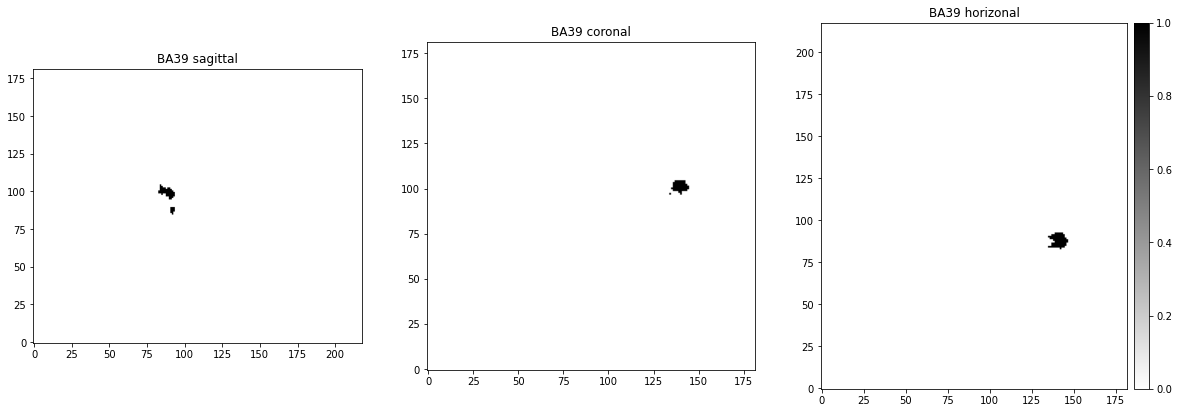

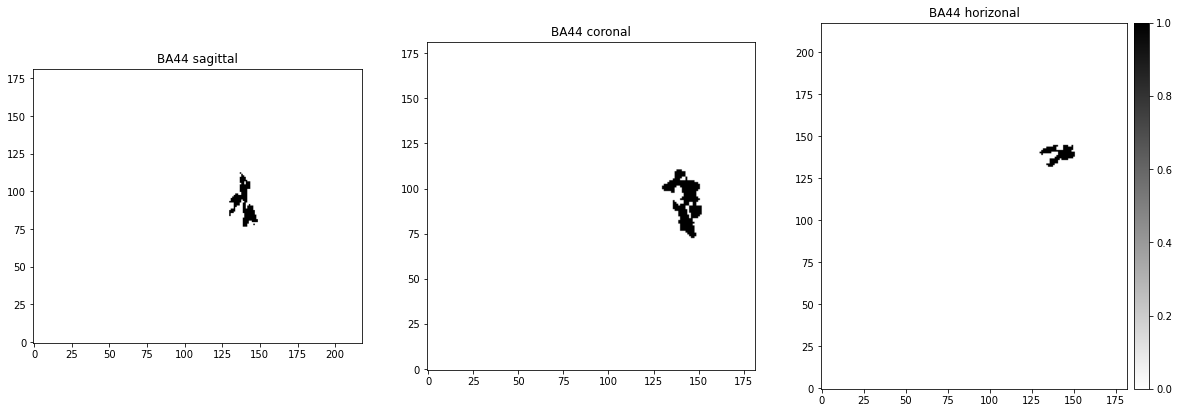

In [89]:
# load brodmann area template.
# ba 39 (no equiv). but inferior parietal lobe PF cm = J 29/30 
# ba 44 = J 13(L)/14(R)

atlas = nib.load('/usr/local/fsl/data/atlases/Juelich/Juelich-maxprob-thr50-1mm.nii.gz')
atlas = atlas.get_fdata()
atlasba39 = atlas == 29
atlasba44 = atlas == 13


temp = mni_template*atlasba39


show_slices(atlasba39, [142,84,100], 'BA39')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/brodmann_area39.png')

print('Number of voxels in region 1 (BA39): {}'.format(np.sum(atlasba39>0)))
      

figure = show_slices(atlasba44, [142,140,100], 'BA44')

figure.show()
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/brodmann_area44.png')
print('Number of voxels in region 2 (BA44): {}'.format(np.sum(atlasba44>0)))

size_ba39 = np.sum(np.array(atlasba39,dtype=bool))
size_ba44 = np.sum(np.array(atlasba44,dtype=bool))



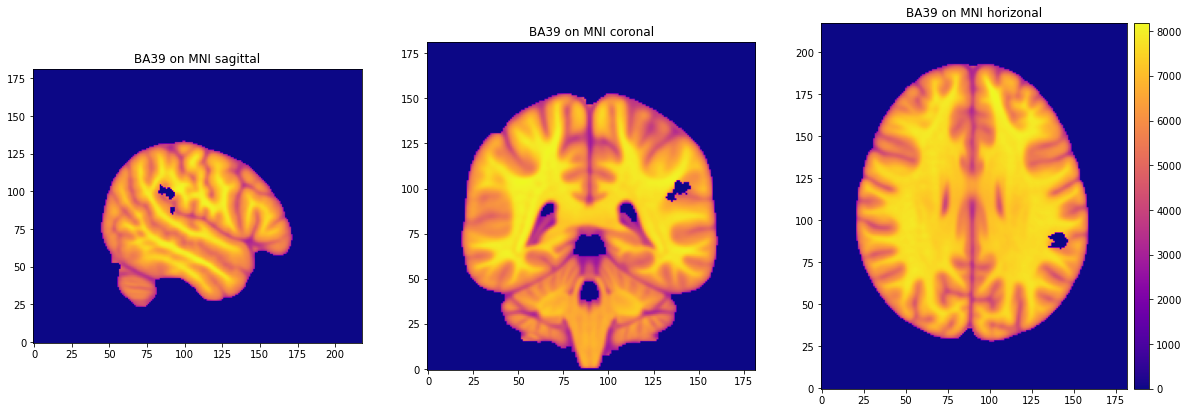

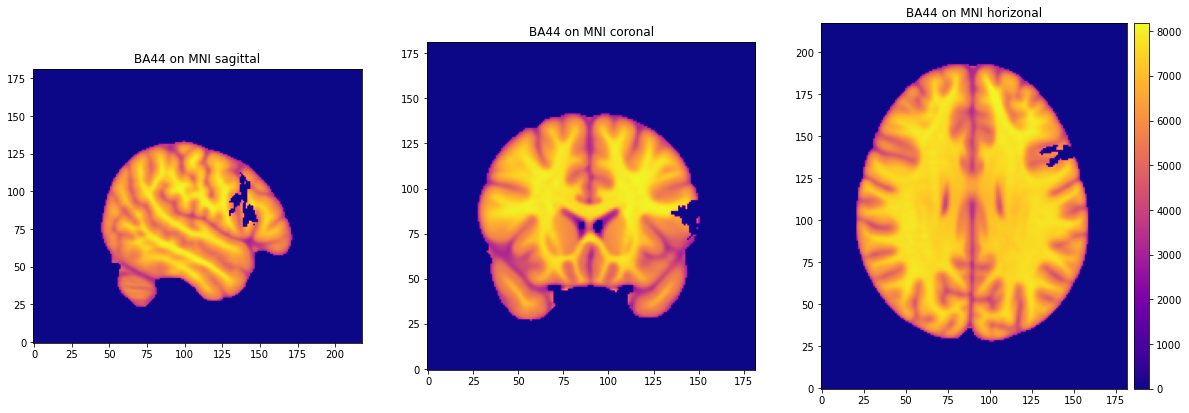

In [134]:
temp = mni_template*~atlasba39
temp2 = show_slices(temp, [142,85,100], 'BA39 on MNI', heatmap = 'plasma')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/brodmann_area39_mni.png')

temp = mni_template*~(atlasba44)
temp2 = show_slices(temp, [142,145,100], 'BA44 on MNI', heatmap = 'plasma')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/brodmann_area44_mni.png')


In [113]:
np.max(lesion)

0

In [14]:
# generate simulated deficit meaures for each subejct 
counter = 0
deficit=np.zeros(shape=len(niftis))
overlap39_all=[]
overlap44_all=[]
for sub in niftis:
    
    sub_data=sub.get_fdata()
    subjid = sublist_ids[counter]
    
    # overlap between lesion and brodmann areas
    overlap39 = np.sum(sub_data*atlasba39)/size_ba39
    overlap44 = np.sum(sub_data*atlasba44)/size_ba44
    
    overlap39_all.append(overlap39)
    overlap44_all.append(overlap44)
    
    # if more than 20% of the voxels in either ba39 or ba44 are damaged, subj has deficit with 90% probability
    if (overlap39 > .20) or (overlap44 > .20):
        rand_draw = np.random.uniform(0, 1)
        if rand_draw < 0.9:
            deficit[counter]=1
        else:
            deficit[counter]=0
    else:
        deficit[counter]=0
    counter = counter +1

0


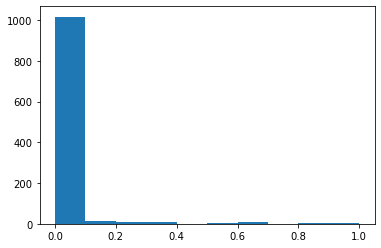

In [18]:
# I really want to know what overlap between ground truth region of interest and the stroke tends to
# be in the simulations and how big the strokes tend to be relative to that overlap and 
# the size of the ground truth region.
#
# Whenever you look at this data I'd also like a sense of the degree of correlation in the presence/absence
# of stroke across voxels. Namely I want a sense of whether there exists voxels 1 and 2 such that voxel 1 
# begin effected by the stroke always implies that voxel 2 is effected by the stroke. I'm not sure what the 
# most informative thing would be to measure this, but for starters a histogram of the correlations might be helpful.
# - IG

plt.hist(overlap44_all)
print(np.sum(overlap44_all==0))

In [64]:
print('Number of voxels in region 1 (BA39): {}'.format(np.sum(atlasba39>0)))
print('Number of voxels in region 2 (BA44): {}'.format(np.sum(atlasba44>0)))

print('\n')
print('Number of lesions that overlap with BA 39: {}/{}'.format(np.count_nonzero(overlap39_all), len(overlap39_all)))
print('Number of lesions that overlap with BA 44: {}/{}'.format(np.count_nonzero(overlap44_all), len(overlap44_all)))
print('\n')

print('Average stroke size (N. voxels): {}'.format(np.mean(vol)))
print('Median stroke size (N. voxels): {}'.format(np.median(vol)))


Number of voxels in region 1 (BA39): 1139
Number of voxels in region 2 (BA44): 3350


Number of lesions that overlap with BA 39: 103/1068
Number of lesions that overlap with BA 44: 88/1068


Average stroke size (N. voxels): 28019.07490636704
Median stroke size (N. voxels): 5849.0


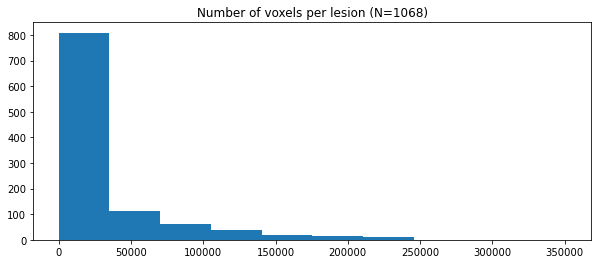

In [151]:
fig,ax = plt.subplots(figsize = (10,4))
plt.hist(vol)
plt.title('Number of voxels per lesion (N=1068)')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/nvoxels_perlesion.png')

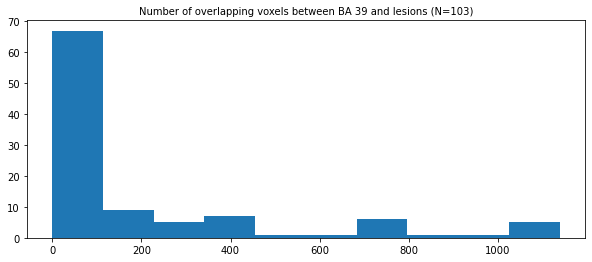

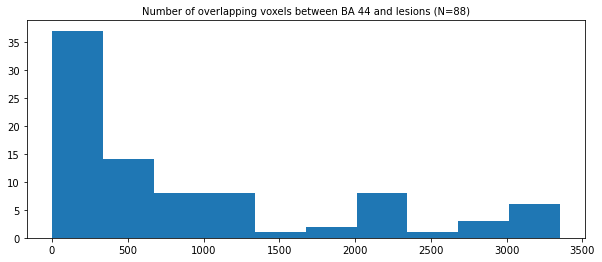

In [153]:
overlap44_all = np.array(overlap44_all)
overlap39_all = np.array(overlap39_all)

overlap44_all_gr0 = overlap44_all[overlap44_all>0]*size_ba44
overlap39_all_gr0 = overlap44_all[overlap39_all>0]*size_ba39


fig,ax=plt.subplots(figsize = (10,4))
plt.hist(overlap39_all_gr0)
plt.title('Number of overlapping voxels between BA 39 and lesions (N=103)', fontsize=10)
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/n_nonzero_overlaps_ba39.png')

fig,ax=plt.subplots(figsize = (10,4))
plt.hist(overlap44_all_gr0)
plt.title('Number of overlapping voxels between BA 44 and lesions (N=88)', fontsize=10)
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/n_nonzero_overlaps_ba44.png')

In [7]:
def np_pearson_cor(x, y):
    xv = x - x.mean(axis=0)
    yv = y - y.mean(axis=0)
    xvss = (xv * xv).sum(axis=0)
    yvss = (yv * yv).sum(axis=0)
    result = np.matmul(xv.transpose(), yv) / np.sqrt(np.outer(xvss, yvss))
    # bound the values to -1 to 1 in the event of precision issues
    return np.maximum(np.minimum(result, 1.0), -1.0)

In [3]:
lesion_table_vec_thr5=np.loadtxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/lesion_table_vec_thr5.txt', dtype ='f', delimiter=',')
gr5subjects_voxels=np.loadtxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/gr5subjects_voxels.txt')
mnimask= np.loadtxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/mnimask.txt')


In [9]:
lesion_table_vec_thr5.shape
print(gr5subjects_voxels.shape)

(134301,)


In [5]:

degree_x = np.zeros(shape = (902629,1))
print(degree_x)
nodestr = np.zeros(shape = (902629,1))
degree_x1 = np.zeros(shape = (902629,1))


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
#for x in range(0, lesion_table_vec_thr5.shape[0]):
for x in range(0, lesion_table_vec_thr5.shape[0]):

    if mnimask[x] == 0:
        degree_x[x] = 0
        degree_x1[x]=0

    elif np.sum(lesion_table_vec_thr5[x])==0:
        degree_x[x]=0
        degree_x1[x] = 0
    else:
        print('hi')
        xycor=np.zeros(shape=(gr5subjects_voxels.shape[0],1))
        allnorms=[]
        print('starting')
        for y in range(0, gr5subjects_voxels.shape[0]):
            xycor = np_pearson_cor(lesion_table_vec_thr5[x],lesion_table_vec_thr5[np.int64(gr5subjects_voxels[y])])
            if xycor >0:
                allnorms.append(allnorms)
                
        print('finishing)')
        nodestr[x] = np.sum(allnorms)
        degree_x[x]= np.sum(allnorms>0.7)
        degree_x1[x] = np.sum(allnorms==1)
        np.savetxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/str_node_{}.txt'.format(x),nodestr[x])
        np.savetxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/degree_node_{}.txt'.format(x),degree_x[x])
        np.savetxt('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/degree_node1_{}.txt'.format(x),degree_x1[x])


        
        
        

hi
starting


<ipython-input-7-29b1f1091d97>:6: RuntimeWarning: invalid value encountered in true_divide
  result = np.matmul(xv.transpose(), yv) / np.sqrt(np.outer(xvss, yvss))


In [ ]:
x

In [ ]:

for x = 1:size(lesion_table_vec_thr5,1)
    
    if mnimask(x)==0
        degree_x(x)=0;
        degree_x1(x)=0;
    elseif sum(lesion_table_vec_thr5(x,:), 2)==0
        degree_x(x)=0;
        degree_x1(x) = 0;
    else

        xycor=zeros(length(gr5subjects_voxels),1);
        allnorms=[];
        tic
        for y = 1:length(gr5subjects_voxels)
           
           xycor = norm(lesion_table_vec_thr5(x, :)'-lesion_table_vec_thr5(gr5subjects_voxels(y), :)',Inf);
           if xycor > 0
               allnorms = [allnorms, xycor];
           end
        end
        toc
        
        nodestr(x) = sum(allcors>0, 'omitnan');
        degree_x(x) = sum(allcors>0.7);
        degree_x1(x) = sum(allcors==1);
        writematrix(nodestr(x), ['/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/str_node_', num2str(x) , '.txt'])

        writematrix(degree_x(x), ['/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/degree_node_', num2str(x) , '.txt'])
        writematrix(degree_x1(x), ['/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/lesiondef_inf/degree_node1_', num2str(x) , '.txt'])
       
    end
end